In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cmcrameri import cm
import matplotlib.colors as colors

In [2]:
all_events = pd.read_csv("../all_side_events_complete_lang.csv",encoding = "utf-8")
all_events[["COP","Num"]] = all_events["SE_Code"].str.split("-",expand=True)
all_events["Num"] = all_events["Num"].astype(int)
all_events["Num"] = all_events["Num"]+1
all_events

,SE_Code,Code,Title/theme/speakers,Organizer,Date,Title/Description,Speakers,Organizer_Affiliation,Organizer_Name,Organizer_Count,Year,word_count,lang_most,Title/Description_new,COP,Num
0,COP28-000,0,COP 28: Facing the challenges for developing c...,Yvonne Miller Berlie Third World Network (TWN...,"Fri, 01 Dec 2023",COP 28: Facing the challenges for developing c...,Speakers: to be decided,"['Bolivia (Plurinational State of)', 'Third Wo...","['Yvonne Miller Berlie', 'Diego Pacheco']",2.0,2023,20,en,COP 28: Facing the challenges for developing c...,COP28,1
1,COP28-001,1,The Global Stocktake: How to strengthen climat...,Amir Khouzam International Committee of the R...,"Fri, 01 Dec 2023",The Global Stocktake: How to strengthen climat...,Speakers: World Bank Group UNHCR ICRC Somalia ...,"['Somalia', 'International Committee of the Re...","['Amir Khouzam', 'Emily Wilkinson', 'Hafsa Abd...",3.0,2023,59,en,The Global Stocktake: How to strengthen climat...,COP28,2
2,COP28-002,2,Change through participation: Open Dialogues a...,Zuzanna Borowska Polish Ecological Club (PEC)...,"Fri, 01 Dec 2023",Change through participation: Open Dialogues a...,Speakers: A diverse group of speakers from the...,"['REScoop.eu vzw', 'India Water Foundation', '...","['Zuzanna Borowska', 'Olumide Idowu', 'FELI ES...",7.0,2023,57,en,Change through participation: Open Dialogues a...,COP28,3
3,COP28-003,3,Partnerships for Sustainable Finance: Opportun...,Samuel Confidence Dotse HATOF Foundation samu...,"Fri, 01 Dec 2023",Partnerships for Sustainable Finance: Opportun...,Speakers: 1. Minister of Lands and Natural Res...,['Faith Association of the Rehabilitation of S...,"['Samuel Confidence Dotse', 'Samuel Baechie']",2.0,2023,42,en,Partnerships for Sustainable Finance: Opportun...,COP28,4
4,COP28-004,4,Proven climate solutions: following IP&LC lead...,Ashley Emerson Health In Harmony (HIH) ashley...,"Fri, 01 Dec 2023",Proven climate solutions: following IP&LC lead...,"Speakers: Myrna Cunningham, Pawanka Fund Nonet...","['Meridian Institute', 'Rights and Resources I...","['Ashley Emerson', 'Liz Duxbury', 'Lucy Mulenk...",4.0,2023,50,en,Proven climate solutions: following IP&LC lead...,COP28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4683,COP09-109,109,Russian Business Forum: Corporations and Regio...,Evgeniy Sokolov National Carbon Sequestration...,"Thu, 11 Dec 2003",Russian Business Forum: Corporations and Regio...,NaN,['National Carbon Sequestration Foundation (NC...,['Evgeniy Sokolov'],1.0,2003,41,en,Russian Business Forum: Corporations and Regio...,COP09,110
4684,COP09-110,110,Standards to ensure high quality LULUCF projec...,Olivia Tanujaya Yayasan Pelangi (PELANGI) oli...,"Thu, 11 Dec 2003",Standards to ensure high quality LULUCF projec...,NaN,['Yayasan Pelangi (PELANGI)'],['Olivia Tanujaya'],1.0,2003,51,en,Standards to ensure high quality LULUCF projec...,COP09,111
4685,COP09-111,111,Linking Article 2 and Article 6: Experiments i...,Jean-Pascal van Ypersele Belgium vanypersele@...,"Fri, 12 Dec 2003",Linking Article 2 and Article 6: Experiments i...,NaN,['Belgium'],['Jean-Pascal van Ypersele'],1.0,2003,49,en,Linking Article 2 and Article 6: Experiments i...,COP09,112
4686,COP09-112,112,South-North Dialogue - Equity in the Greenhous...,"Bernd Brouns Wuppertal Institute for Climate,...","Fri, 12 Dec 2003",South-North Dialogue - Equity in the Greenhous...,NaN,"['Wuppertal Institute for Climate, Environment...",['Bernd Brouns'],1.0,2003,38,en,South-North Dialogue - Equity in the Greenhous...,COP09,113


In [7]:
energy_topics = pd.read_csv("../topic/bertopic/distil_document_info_new_energy.csv",encoding = "utf-8")
energy_topics = energy_topics.set_index("Unnamed: 0")
energy_events = all_events[all_events.index.isin(energy_topics.index)]
energy_events = pd.merge(energy_events,energy_topics[["new_topics_ctfidf"]],left_index=True,right_index=True)
energy_events.to_csv("../extracted_events_energy.csv",index=False)

food_topics = pd.read_csv("../topic/bertopic/distil_document_info_new_food.csv",encoding = "utf-8")
food_topics = food_topics.set_index("Unnamed: 0")
food_events = all_events[all_events.index.isin(food_topics.index)]
food_events = pd.merge(food_events,food_topics[["new_topics_ctfidf"]],left_index=True,right_index=True)
food_events.to_csv("../extracted_events_food.csv",index=False)

In [8]:
redd_topics = pd.read_csv("../topic/bertopic/distil_document_info_new_redd.csv",encoding = "utf-8")
redd_topics = redd_topics.set_index("Unnamed: 0")
redd_events = all_events[all_events.index.isin(redd_topics.index)]
redd_events = pd.merge(redd_events,redd_topics[["new_topics_ctfidf"]],left_index=True,right_index=True)
redd_events.to_csv("../extracted_events_redd.csv",index=False)

In [4]:
match_ngo = pd.read_excel("../../orgs/org_list_ngo_check.xlsx",sheet_name="match")
ngo_list = pd.read_excel("../../orgs/org_list_ngo.xlsx")
igo_list = pd.read_excel("../../orgs/org_list_igo.xlsx")
party_list = pd.read_excel("../../orgs/org_list_party.xlsx")
un_list = pd.read_excel("../../orgs/org_list_un.xlsx")
un_list = un_list[un_list["Type"].isna()==False]
org_mismatch = pd.read_excel("event_affiliation_mismatch.xlsx")

In [5]:
# all events
side_events_all = all_events.groupby(["COP"]).count()[["Num"]]

### assign organizations 

In [6]:
def assign_organizations(select_events,title_name):
    for ind in select_events.index:
        org_names = select_events.loc[ind,"Organizer_Affiliation"]
        org_names = org_names.replace("', '","***").replace(', "',"***").replace('", ',"***")
        org_names = org_names.replace("[","").replace("]","").replace("'","").replace('"',"")
        org_names_list = org_names.split("***")
        event_data = pd.DataFrame(data={"Org":org_names_list}).set_index("Org")
        for org in org_names_list:
            org = org.replace("['","").replace("']","").replace("'","").replace('"',"")
            if org in list(org_mismatch["original_name"]): # REPLACE NAME IF IT'S WEIRD
                o = org_mismatch.query("original_name==@org")["matched_name"].iloc[0]
            else:
                o = org

            event_data.loc[org,"Weight"] = 1/(len(org_names_list))
            if o in list(party_list["party"]): # ORGANZIED BY A PARTY
                org_type = party_list.query("party==@o")["type"]
                event_data.loc[org,"Org_Type"] = "Party"
                event_data.loc[org,"Country"] = o
                event_data.loc[org,"Country_Type"] = org_type.iloc[0]
            elif o in list(ngo_list["Organization"]): # ORGANIZED BY A NGO
                #matched_name = match_ngo.query("nominator==@o")["matched_name"].iloc[0]
                org_type = ngo_list.query("Organization==@o")["Constituency"].iloc[0]
                if org_type in ["Constituency - Environmental CAN","Constituency - Environmental CJN"]:
                    org_type = "Constituency - Environmental"
                elif type(org_type) == float or org_type in ['Constituency - Farmers','Constituency - Local government and Municipal authorities','Constituency - Trade Unions']: 
                    org_type = "Constituency - Others"
                country_aff = ngo_list.query("Organization==@o")["Country"].iloc[0]
                event_data.loc[org,"Org_Type"] = org_type
                event_data.loc[org,"Country"] = country_aff
                if country_aff in list(party_list["party"]):
                    country_type = party_list.query("party==@country_aff")["type"].iloc[0]
                    event_data.loc[org,"Country_Type"] = country_type
            elif o in list(igo_list["Organization"]): # ORGANIZED BY IGO
                country_aff = igo_list.query("Organization==@o")["Country"].iloc[0]
                event_data.loc[org,"Org_Type"] = "IGO"
                event_data.loc[org,"Country"] = country_aff
                if country_aff in list(party_list["party"]):
                    country_type = party_list.query("party==@country_aff")["type"].iloc[0]
                    event_data.loc[org,"Country_Type"] = country_type
            elif o in list(un_list["Organization"]): # ORGANIZED BY THE UN
                event_data.loc[org,"Org_Type"] = "UN"
                event_data.loc[org,"Country"] = "International"
                event_data.loc[org,"Country_Type"] = "International"
            event_data.loc[org,"clean_org"] = o
        event_data = event_data.reset_index()
        event_data["SE_Code"] = select_events.loc[ind,"SE_Code"]
        if ind == select_events.index[0]:
            event_data_consolidated = event_data
        else:
            event_data_consolidated = pd.concat([event_data_consolidated,event_data])
    event_data_consolidated[["COP","Num"]] = event_data_consolidated["SE_Code"].str.split("-",expand=True)
    event_data_consolidated["Org_Type"] = event_data_consolidated["Org_Type"].fillna("No match")
    event_data_consolidated["Country_Type"] = event_data_consolidated["Country_Type"].fillna("No match")

    event_data_consolidated = event_data_consolidated.set_index("SE_Code").reset_index()
    event_data_consolidated.to_excel("event_affiliation_"+title_name+".xlsx", index=False)
    return event_data_consolidated

In [7]:
event_data_fossil = assign_organizations(energy_events,"energy")
event_data_fossil.groupby(["clean_org","Org_Type","Country_Type"]).sum()[["Weight"]].rename(columns={"Weight":"Events"}).to_excel("organiser_weight_energy.xlsx")
event_data_fossil

,SE_Code,Org,Weight,Org_Type,Country,Country_Type,clean_org,COP,Num
0,COP28-019,"Human Rights Watch, Inc. (HRW)",0.2,Constituency - Others,United States of America,Annex II,"Human Rights Watch, Inc. (HRW)",COP28,019
1,COP28-019,Oil Change International (OCI),0.2,Constituency - Environmental,United States of America,Annex II,Oil Change International (OCI),COP28,019
2,COP28-019,Climate Analytics GmbH,0.2,Constituency - Research and independent,Germany,Annex II,Climate Analytics GmbH,COP28,019
3,COP28-019,Heinrich Böll Foundation (HBF),0.2,Constituency - Environmental,Germany,Annex II,Heinrich Böll Foundation (HBF),COP28,019
4,COP28-019,Recourse,0.2,Constituency - Environmental,Netherlands,No match,Recourse,COP28,019
...,...,...,...,...,...,...,...,...,...
756,COP09-077,International Energy Agency (IEA),1.0,IGO,France,Annex II,International Energy Agency (IEA),COP09,077
757,COP09-091,Resources for the Future (RFF),1.0,Constituency - Research and independent,United States of America,Annex II,Resources for the Future (RFF),COP09,091
758,COP09-098,Greenpeace International (GREENPEACE),1.0,Constituency - Environmental,Netherlands,No match,Greenpeace International (GREENPEACE),COP09,098
759,COP09-107,United Kingdom of Great Britain and Northern I...,1.0,Party,United Kingdom of Great Britain and Northern I...,Annex II,United Kingdom of Great Britain and Northern I...,COP09,107


In [8]:
event_data_food = assign_organizations(food_events,"food")
event_data_food.groupby(["clean_org","Org_Type","Country_Type"]).sum()[["Weight"]].rename(columns={"Weight":"Events"}).to_excel("organiser_weight_food.xlsx")
event_data_food

,SE_Code,Org,Weight,Org_Type,Country,Country_Type,clean_org,COP,Num
0,COP28-022,South Central India Network for Development Al...,0.50,Constituency - Environmental,India,Non-Annex,South Central India Network for Development Al...,COP28,022
1,COP28-022,LAYA,0.50,Constituency - Environmental,India,Non-Annex,LAYA,COP28,022
2,COP28-023,Family Health International (FHI 360),0.25,Constituency - Research and independent,United States of America,Annex II,Family Health International (FHI 360),COP28,023
3,COP28-023,Queen Mary University of London (QMUL),0.25,Constituency - Research and independent,United Kingdom of Great Britain and Northern I...,Annex II,Queen Mary University of London (QMUL),COP28,023
4,COP28-023,Change For Planet (CFP),0.25,Constituency - Youth,Italy,Annex II,Change For Planet (CFP),COP28,023
...,...,...,...,...,...,...,...,...,...
458,COP14-162,World Food Programme (WFP),1.00,UN,International,International,World Food Programme (WFP),COP14,162
459,COP13-008,World Food Programme (WFP),1.00,UN,International,International,World Food Programme (WFP),COP13,008
460,COP11-089,International Water Management Institute (IWMI),1.00,IGO,Sri Lanka,Non-Annex,International Water Management Institute (IWMI),COP11,089
461,COP11-109,International Fertilizer Association (IFA),1.00,Constituency - Business and Industry,France,Annex II,International Fertilizer Association (IFA),COP11,109


### group the organization and country categories

In [9]:
def group_categories(event_data_consolidated):
    
    for phrase in event_data_consolidated["COP"].unique():
        mask = np.column_stack([event_data_consolidated[col].str.contains(phrase, na=False) for col in event_data_consolidated[["SE_Code"]]])
        year_se_select = event_data_consolidated.loc[mask.any(axis=1)] 

        year_se_select_org = year_se_select.groupby("Org_Type").sum()[["Weight"]]
        year_se_select_org["COP"] = phrase

        year_se_select_country = year_se_select.groupby("Country_Type").sum()[["Weight"]]
        year_se_select_country["COP"] = phrase

        if phrase == event_data_consolidated["COP"].unique()[0]:
            select_org_type = year_se_select_org
            select_country_type = year_se_select_country
        else:
            select_org_type = pd.concat([select_org_type,year_se_select_org])
            select_country_type = pd.concat([select_country_type,year_se_select_country])
    insert_data = pd.DataFrame(data={"Weight":0,"COP":side_events_all.index})
    select_org_type = select_org_type.reset_index()
    select_country_type = select_country_type.reset_index()
    select_org_type = pd.concat([select_org_type,insert_data])
    select_country_type = pd.concat([select_country_type,insert_data])
    
    return select_org_type, select_country_type

In [10]:
fossil_org, fossil_country = group_categories(event_data_fossil) 
food_org, food_country = group_categories(event_data_food)

In [27]:
energy_org_plot = fossil_org.dropna()
energy_org_plot["cop_num"] = energy_org_plot["COP"].str[3:].astype(int)
energy_org_plot["Org_Type"] = energy_org_plot["Org_Type"].str.replace("Constituency","NGO")
energy_org_plot["Org_Type"] = energy_org_plot["Org_Type"].str.replace("and","&")
energy_org_plot.to_csv("plot_data_energy_org.csv")

energy_country_plot = fossil_country.dropna()
energy_country_plot["cop_num"] = energy_country_plot["COP"].str[3:].astype(int)
energy_country_plot.to_csv("plot_data_energy_country.csv")

C:\Users\jx920\AppData\Local\Temp\ipykernel_22208\1065072655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_org_plot["cop_num"] = energy_org_plot["COP"].str[3:].astype(int)
C:\Users\jx920\AppData\Local\Temp\ipykernel_22208\1065072655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_org_plot["Org_Type"] = energy_org_plot["Org_Type"].str.replace("Constituency","NGO")
C:\Users\jx920\AppData\Local\Temp\ipykernel_22208\1065072655.py:4: SettingWithCopyWarning: 
A value is trying to be set on

### consolidate visualization

In [15]:
# pivoted events by country type
# fossil
pivoted_fossil_country = fossil_country.pivot(index='COP', columns='Country_Type', values='Weight')
pivoted_fossil_country = pivoted_fossil_country.fillna(0).drop(columns=pivoted_fossil_country.columns[0])
pivoted_fossil_country = pivoted_fossil_country[['Annex II','Annex I Only','Non-Annex','International','No match']]

# food
pivoted_food_country = food_country.pivot(index='COP', columns='Country_Type', values='Weight')
pivoted_food_country = pivoted_food_country.fillna(0).drop(columns=pivoted_food_country.columns[0])
pivoted_food_country = pivoted_food_country[['Annex II','Annex I Only','Non-Annex','International','No match']]

# pivoted events by organization type
# fossil
pivoted_fossil_org = fossil_org.pivot(index='COP', columns='Org_Type', values='Weight')
pivoted_fossil_org = pivoted_fossil_org.fillna(0).drop(columns=pivoted_fossil_org.columns[0])
for col in pivoted_fossil_org.columns:
    pivoted_fossil_org = pivoted_fossil_org.rename(columns={col:col.replace("Constituency -","NGO").replace("and","&")})
    pivoted_fossil_org = pivoted_fossil_org.rename(columns={'NGO - Local government & Municipal authorities':'NGO - Local government'})

# food
pivoted_food_org = food_org.pivot(index='COP', columns='Org_Type', values='Weight')
pivoted_food_org = pivoted_food_org.fillna(0).drop(columns=pivoted_food_org.columns[0])
for col in pivoted_food_org.columns:
    pivoted_food_org = pivoted_food_org.rename(columns={col:col.replace("Constituency","NGO").replace("and","&")})
    pivoted_food_org = pivoted_food_org.rename(columns={'NGO - Local government & Municipal authorities':'NGO - Local government'})

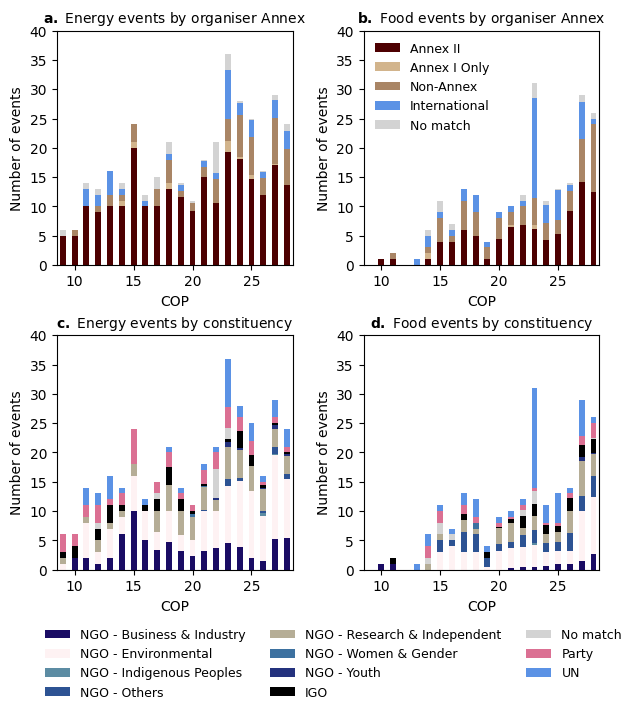

In [13]:
fig, axes = plt.subplots(2,2,figsize=(7,7))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

title_list = ["Energy", "Food"]

country_data = [pivoted_fossil_country,pivoted_food_country]
label_list_country = ["a.","b."]
for i in np.arange(2):
    # barplot
    country_data[i].plot.bar(stacked=True,ax=axes[0,i],color=[cm.bilbaoS(1),"tan",cm.bilbaoS(2),"#5b92e5","lightgray"])
    axes[0,i].legend(loc="upper left",frameon=False,fontsize=9)
    if i == 1: 
        axes[0,i-1].get_legend().remove()
    axes[0,i].set_title(r"$\bf{" + label_list_country[i] + "}$ "+title_list[i]+" events by organiser Annex",fontsize=10)

pivoted_food_org = pivoted_food_org.rename(columns={"NGO - Research & independent":"NGO - Research & Independent"})
pivoted_food_org = pivoted_food_org.rename(columns={"NGO - Indigenous peoples":"NGO - Indigenous Peoples"})
org_data = [pivoted_fossil_org,pivoted_food_org]
label_list_org = ["c.","d."]
for i in np.arange(2):
    org_data[i].plot.bar(stacked=True,ax=axes[1,i],color=[cm.lapazS(0),cm.lapazS(1),cm.lapazS(2),cm.lapazS(3),cm.lapazS(4),cm.lapazS(5),cm.lapazS(6),
                                 "black","lightgray","palevioletred","#5b92e5"])
    axes[1,i].legend(loc='lower left', frameon=False,fontsize=9,bbox_to_anchor=(-1.4,-0.6),ncol=3)
    if i == 1:
        axes[1,i-1].get_legend().remove()
    axes[1,i].set_ylabel("Number of events")
    axes[1,i].set_title(r"$\bf{" + label_list_org[i] + "}$ "+title_list[i]+" events by constituency",fontsize=10)

for ax in axes.reshape(-1): 
    x_ticks = np.arange(4)*5+1
    x_tick_labels = np.arange(4)*5+10
    ax.set_xticks(x_ticks,x_tick_labels,rotation=0)
    ax.set_ylabel("Number of events")    
    ax.set_ylim([0,40])
#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)


fig.savefig("interest_group_stats.png",dpi=600, bbox_inches='tight')
fig.savefig("interest_group_stats.pdf")